In [19]:
print("Jupyter working successfully")

Jupyter working successfully


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product category', 'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='str')

In [45]:
import pandas as pd

# Load datasets
customers = pd.read_excel("project3/customers.xlsx")
orders = pd.read_excel("project3/orders.xlsx")
order_items = pd.read_excel("project3/order_items.xlsx")
payments = pd.read_excel("project3/payments.xlsx")
products = pd.read_excel("project3/products.xlsx")
sellers = pd.read_excel("project3/sellers.xlsx")
geo = pd.read_csv("project3/geolocation.csv")

# Merge step by step
df = orders.merge(customers, on="customer_id")
df = df.merge(order_items, on="order_id")
df = df.merge(payments, on="order_id")
df = df.merge(products, on="product_id")

# Convert order date to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Check master dataset
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_installments,payment_value,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,18.12,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,2.00,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,18.59,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1,141.46,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,3,179.12,automotive,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [47]:
import matplotlib.pyplot as plt

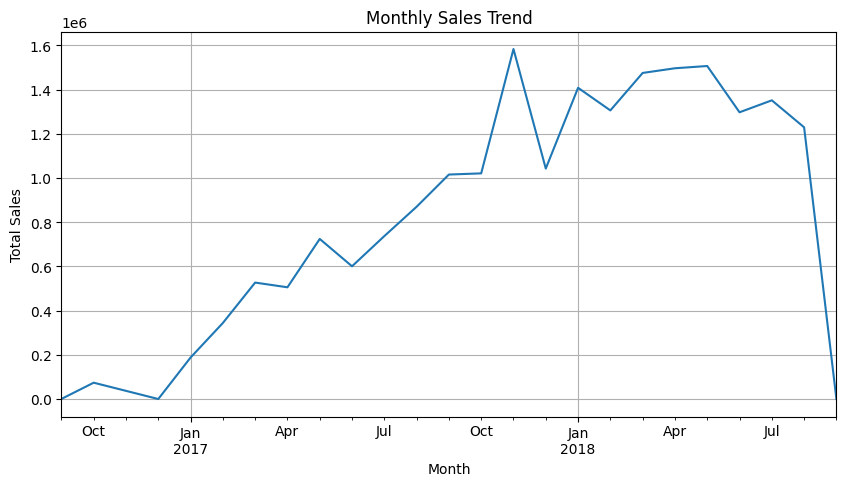

In [50]:
# Group by month
monthly_sales = df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['payment_value'].sum()

# Plot
monthly_sales.plot(kind='line', figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

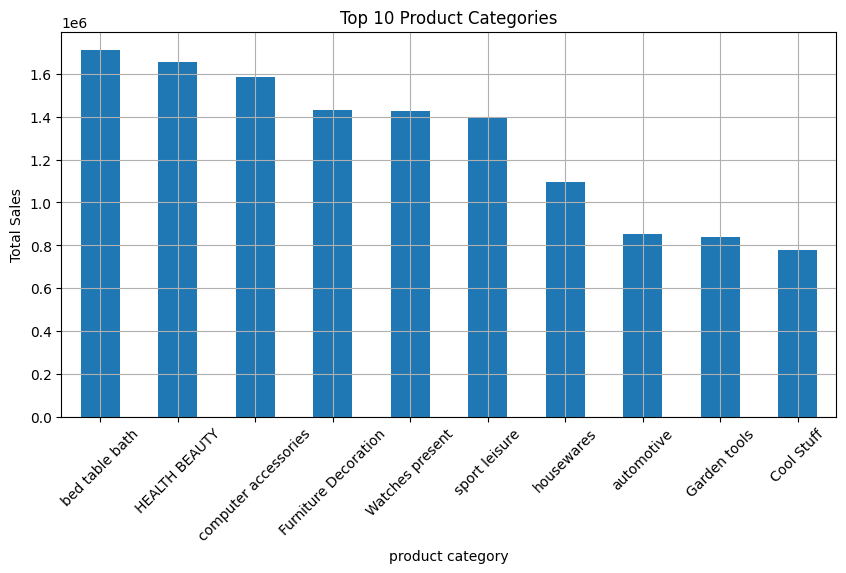

In [60]:
# Group by product category
category_sales = df.groupby('product category')['payment_value'].sum().sort_values(ascending=False).head(10)

# Plot
category_sales.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Product Categories")
plt.xlabel("product category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [62]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product category', 'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='str')

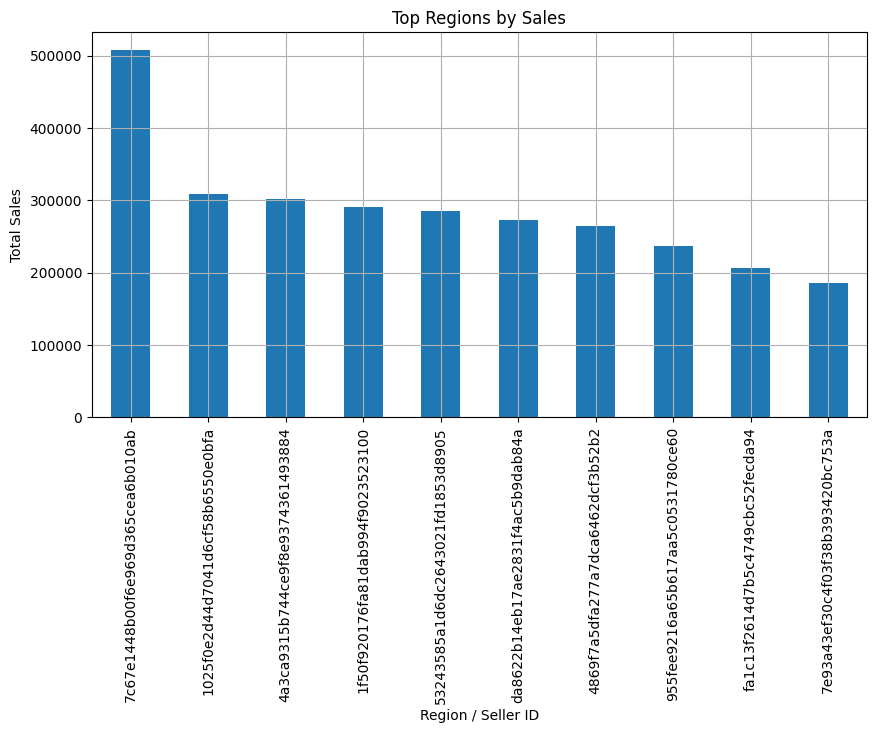

In [80]:
# Merge sellers with geo if needed
region_sales = df.groupby('seller_id')['payment_value'].sum().sort_values(ascending=False).head(10)

# Plot
region_sales.plot(kind='bar', figsize=(10,5))
plt.title("Top Regions by Sales")
plt.xlabel("Region / Seller ID")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

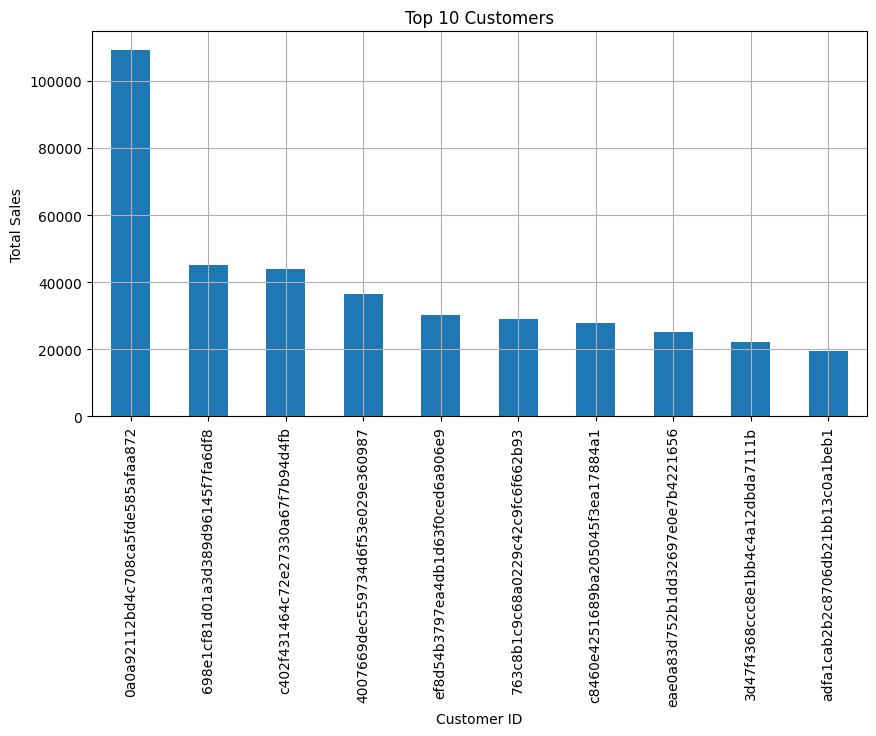

In [68]:
customer_sales = df.groupby('customer_unique_id')['payment_value'].sum().sort_values(ascending=False).head(10)

customer_sales.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

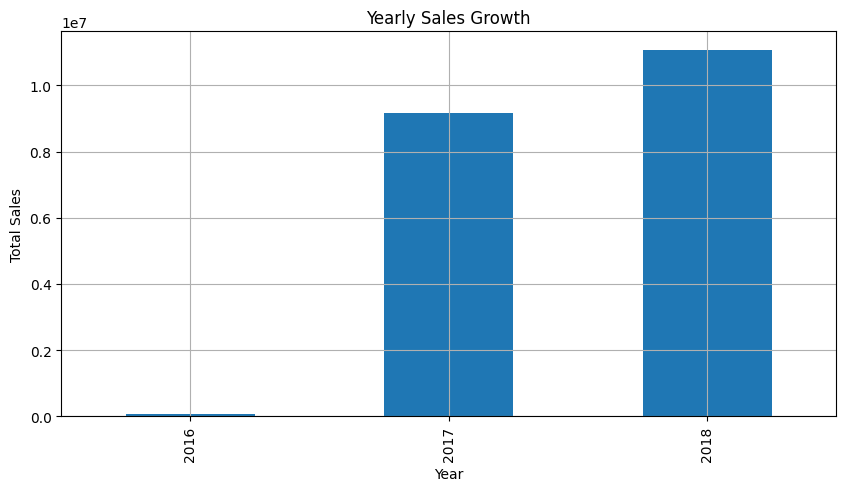

In [70]:
yearly_sales = df.groupby(df['order_purchase_timestamp'].dt.year)['payment_value'].sum()

yearly_sales.plot(kind='bar', figsize=(10,5))
plt.title("Yearly Sales Growth")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

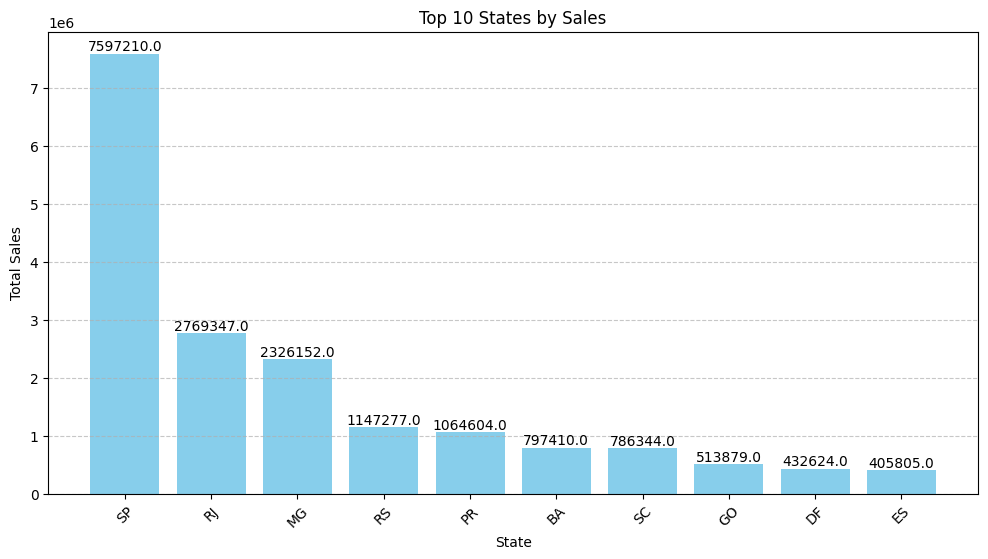

In [74]:
import matplotlib.pyplot as plt

# Group by state and calculate total sales
region_sales = df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(region_sales.index, region_sales.values, color='skyblue')

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval,0), ha='center', va='bottom')

plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [82]:
df['customer_city'].head()

0     sao paulo
1     sao paulo
2     sao paulo
3     barreiras
4    vianopolis
Name: customer_city, dtype: str

In [88]:
# Group by city and sum sales
city_sales = df.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False).head(10)

# Optional: see the top 10 cities
city_sales

customer_city
sao paulo         2839903.47
rio de janeiro    1566591.49
belo horizonte     501261.50
brasilia           430499.43
curitiba           329321.54
porto alegre       315729.22
salvador           289139.66
campinas           267039.20
goiania            212702.97
guarulhos          205350.25
Name: payment_value, dtype: float64

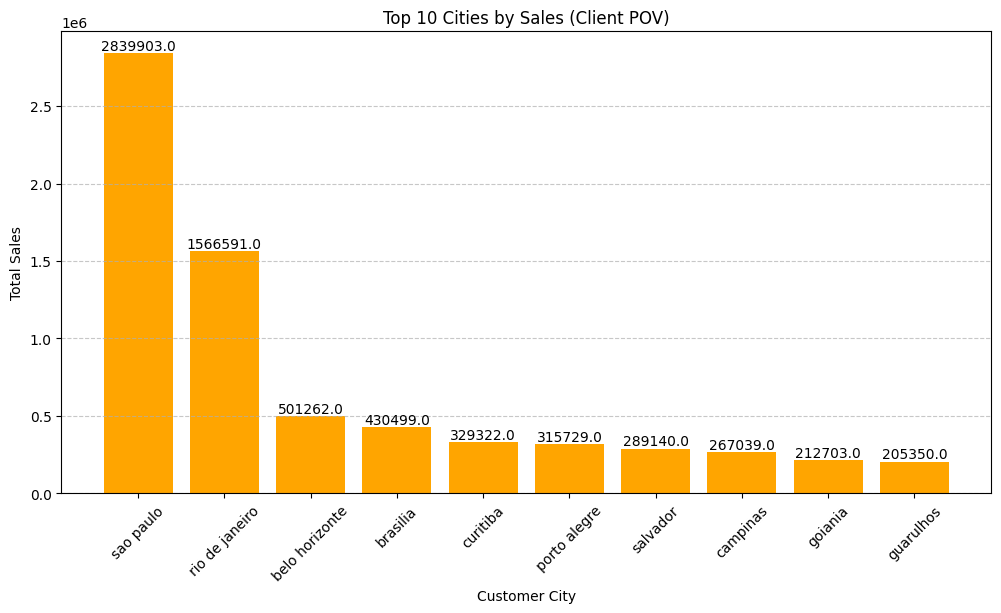

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bars = plt.bar(city_sales.index, city_sales.values, color='orange')

# Add sales values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval,0), ha='center', va='bottom')

plt.title("Top 10 Cities by Sales (Client POV)")
plt.xlabel("Customer City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()